## Lab 7
## Name: Simhadri Tanya
## Reg No: BL.EN.U4AIE21119

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from hmmlearn import hmm
from sklearn.model_selection import train_test_split

In [24]:
# Load the audio signal
filename = "C:\\Users\\Tanya Simhadri\\Downloads\\AI_in_Speech_Processing_recording.mpeg"
y, sr = librosa.load(filename)

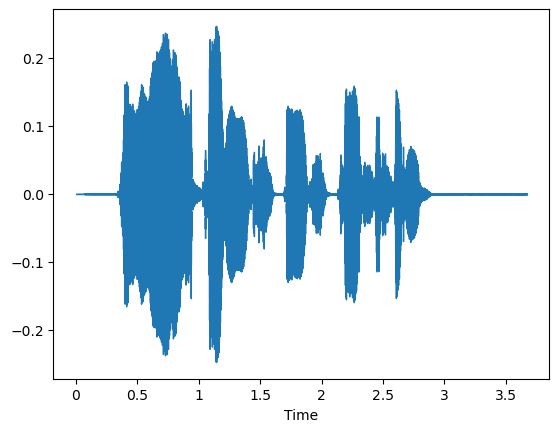

In [25]:
# Display the audio signal
librosa.display.waveshow(y)

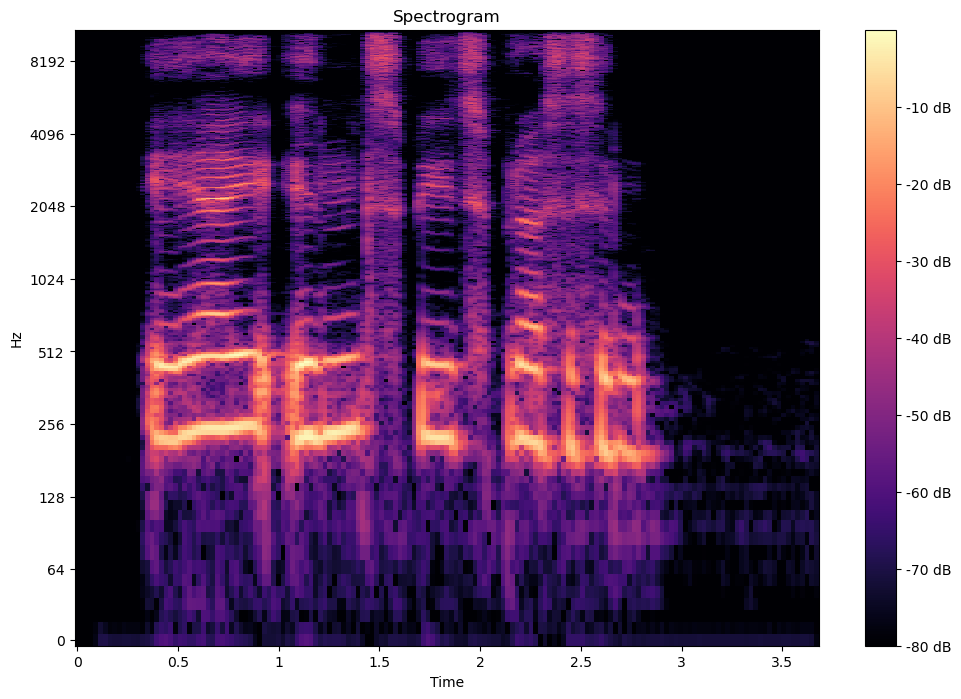

C:\Users\Tanya Simhadri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Log likelihood of the test set: 262585.26344662457


In [23]:
# Function to extract STFT features
def extract_stft_features(signal, n_fft=2048, hop_length=512):
    spectrogram = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))
    return spectrogram


# Load and preprocess data
signal = "C:\\Users\\Tanya Simhadri\\Downloads\\AI_in_Speech_Processing_recording.mpeg"
time_signal, sample_rate = librosa.load(signal)
spectrogram = extract_stft_features(time_signal)


# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(Spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# Function to prepare dataset for HMM
def prepare_dataset(spectrogram, window_size=10):
    # Slide a window over the spectrogram
    X = []
    for i in range(0, spectrogram.shape[1] - window_size):
        X.append(spectrogram[:, i:i+window_size].flatten())
    return np.array(X)

# Prepare dataset
X = prepare_dataset(spectrogram)

# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Train HMM model
n_components = 2  # Number of states in HMM
model = hmm.GaussianHMM(n_components=n_components)
model.fit(X_train)

# Test the model
log_likelihood = model.score(X_test)
print("Log likelihood of the test set:", log_likelihood)